## Stock Price Trading Project

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

# visulaization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# getting stock data from last 5 years
apple_df = yf.download("AAPL", start="2016-01-01", end="2022-12-31")
apple_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


## Feature Information  :

*   Open : The first or initial trading price of the day.
*   High : Highest trading price of the day.
*   Low : Lowest trading price of the day.
*   Close : The last trading price of the day. 
* Adj Close : The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. 
* Volume : Volume is the number of shares of a security traded during a given period of time.




In [5]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000


In [6]:
apple_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,76960600


In [7]:
apple_df.shape

(1762, 6)

In [8]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,79.138645,80.055538,78.255756,79.191879,77.588667,1.209566e+08
std,49.366408,50.024672,48.700561,49.381866,49.746208,5.751090e+07
min,22.500000,22.917500,22.367500,22.584999,20.883030,3.519590e+07
25%,39.183749,39.470626,38.775626,39.098750,37.162582,8.346862e+07
50%,54.127501,54.834999,53.375000,53.938751,51.938318,1.054498e+08
75%,129.357502,131.022499,128.332493,129.914993,128.817692,1.407384e+08
max,182.630005,182.940002,179.119995,182.009995,180.683884,5.334788e+08


### Preprocessing and clean the data

In [9]:
apple_df = apple_df.reset_index()

In [10]:
# Let's make sure 'date' is actually a date in pandas
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

date = apple_df["Date"]

In [11]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1762 non-null   datetime64[ns]
 1   Open       1762 non-null   float64       
 2   High       1762 non-null   float64       
 3   Low        1762 non-null   float64       
 4   Close      1762 non-null   float64       
 5   Adj Close  1762 non-null   float64       
 6   Volume     1762 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.5 KB


In [12]:
# checking any null values in dataset
apple_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

In [13]:
#Line Graph For Volume
def line_graph_close(df, title):
  fig = px.line(df,x="Date", y="Volume", title= title)
  fig.show()

In [14]:
line_graph_close(apple_df , title='Apple Volume On each day')

In [15]:
#OHLC Chart To check Everyday Open close High Low share Price
def ohlc_graph(df):
  fig = go.Figure(go.Candlestick(x=df.Date,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']))
  fig.show()

In [16]:
ohlc_graph(apple_df)

In [17]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,79.138645,80.055538,78.255756,79.191879,77.588667,1.209566e+08
std,49.366408,50.024672,48.700561,49.381866,49.746208,5.751090e+07
min,22.500000,22.917500,22.367500,22.584999,20.883030,3.519590e+07
25%,39.183749,39.470626,38.775626,39.098750,37.162582,8.346862e+07
50%,54.127501,54.834999,53.375000,53.938751,51.938318,1.054498e+08
75%,129.357502,131.022499,128.332493,129.914993,128.817692,1.407384e+08
max,182.630005,182.940002,179.119995,182.009995,180.683884,5.334788e+08


## Strategy 1 : 
If the next trading day's close price is greater than today's close price then, the signal is ‘buy’,
otherwise ‘sell’.

In [18]:
""" 
    Feature Creation : 
    Here, we are creating a new feature called Signal which will indicate when to buy a stock and when to sell a stock. 
"""
y = np.where(apple_df['Close'].shift(-1) > apple_df['Close'],1, -1)
apple_df['Signal'] = y
signal_map_dict= {-1:'Sell', 1:'Buy'}
apple_df['stock_signal'] = apple_df['Signal'].map(signal_map_dict)

In [19]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600,-1,Sell
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000,-1,Sell
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600,-1,Sell
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600,1,Buy
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000,1,Buy
...,...,...,...,...,...,...,...,...,...
1757,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,-1,Sell
1758,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,-1,Sell
1759,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,1,Buy
1760,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700,1,Buy


In [20]:
apple_df['stock_signal'].value_counts()

Buy     934
Sell    828
Name: stock_signal, dtype: int64

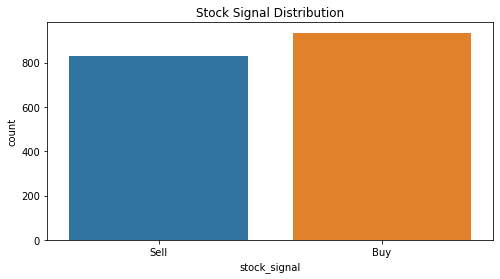

In [21]:
# Visualize Overall Stock_Signal distribution:
plt.figure(figsize=(8,4))
plt.title("Stock Signal Distribution")
sns.countplot(x='stock_signal', data=apple_df);

In [22]:
# Yearly Buy/Sell Stock Distribution
sample_df = apple_df.groupby(apple_df['Date'].dt.year)['stock_signal'].value_counts().unstack()
sample_df

stock_signal,Buy,Sell
Date,,
2016,133,119
2017,138,113
2018,129,122
2019,146,106
2020,136,117
2021,135,117
2022,117,134


**Observation :** Based on this distribution, we can say that Highest number of stocks Buy in 2019 (during covid time) and lowest number of stock buy in 2022. and for selling the stock it is exactly oposite in year 2019 and 2022. 

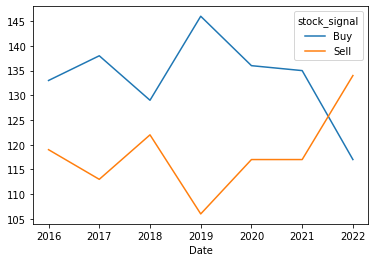

In [23]:
apple_df.groupby(apple_df['Date'].dt.year)['stock_signal'].value_counts().unstack().plot()

Based on above graph, we can see that mostly people are buying stocks rather than selling them. 

And in 2019 (during pandemic time), mostly people are buying stocks.

In [24]:
# choosing independent and dependent variables 
X = apple_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = apple_df['Signal']

# train test spilt 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# get the confusion matrix
def get_confusion_matrix(cm,title):
    ax = sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',annot_kws={"fontsize":14})
    ax.set_title(title+'\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');
    return plt.show()

# ML model fit and predict the data
def classification_algorithm(algo_instance, X_train, y_train, X_test, title):
  print("{} Algorithm :".format(title))
  algo_pred = algo_instance.fit(X_train, y_train)
  algo_pred = algo_instance.predict(X_test)
  print(classification_report(y_test,algo_pred))
  algo_result = accuracy_score(y_test,algo_pred)
  print("Accuracy:",algo_result*100)
  algo_cm = confusion_matrix(y_test, algo_pred)
  # getting confusion matrix
  get_confusion_matrix(algo_cm, title="{} Confusion Matrix".format(title))
  return algo_result

KNeighbors Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.46      0.44      0.45       161
           1       0.55      0.56      0.55       192

    accuracy                           0.51       353
   macro avg       0.50      0.50      0.50       353
weighted avg       0.51      0.51      0.51       353

Accuracy: 50.70821529745042


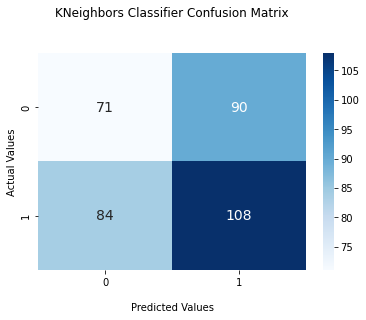

Random Forest Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.43      0.43      0.43       161
           1       0.52      0.53      0.52       192

    accuracy                           0.48       353
   macro avg       0.48      0.48      0.48       353
weighted avg       0.48      0.48      0.48       353

Accuracy: 48.1586402266289


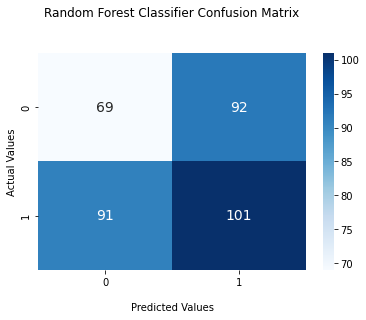

GradientBoosting Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.46      0.32      0.38       161
           1       0.55      0.69      0.61       192

    accuracy                           0.52       353
   macro avg       0.51      0.51      0.50       353
weighted avg       0.51      0.52      0.51       353

Accuracy: 52.124645892351275


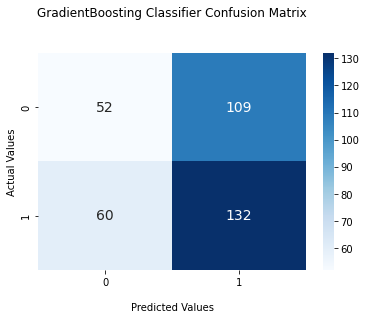

SVM Confusion Matrix Algorithm :
              precision    recall  f1-score   support

          -1       0.63      0.07      0.13       161
           1       0.55      0.96      0.70       192

    accuracy                           0.56       353
   macro avg       0.59      0.52      0.42       353
weighted avg       0.59      0.56      0.44       353

Accuracy: 55.80736543909348


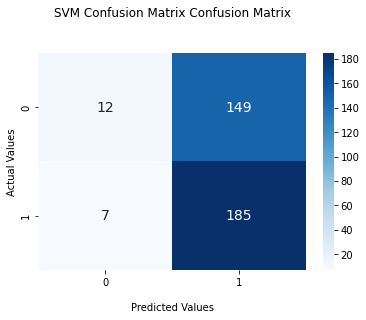

XGBClassifier Confusion Matrix Algorithm :
              precision    recall  f1-score   support

          -1       0.46      0.34      0.39       161
           1       0.54      0.67      0.60       192

    accuracy                           0.52       353
   macro avg       0.50      0.50      0.49       353
weighted avg       0.50      0.52      0.50       353

Accuracy: 51.55807365439094


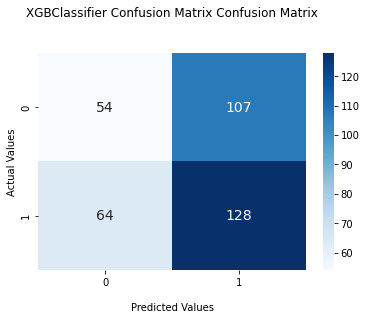

In [25]:
knn_result = classification_algorithm(KNeighborsClassifier(), X_train, y_train, X_test, title='KNeighbors Classifier')
rf_result = classification_algorithm(RandomForestClassifier(), X_train, y_train, X_test, title='Random Forest Classifier')
gb_result = classification_algorithm(GradientBoostingClassifier(), X_train, y_train, X_test, title='GradientBoosting Classifier')
svm_result = classification_algorithm(SVC(), X_train, y_train, X_test, title='SVM Confusion Matrix')
xg_result = classification_algorithm(XGBClassifier(), X_train, y_train, X_test, title='XGBClassifier Confusion Matrix')

In [26]:
results = pd.DataFrame([

    {'Algorithm' : 'K-Nearest Neighbors (KNN)', 'Accuracy' : knn_result*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf_result*100},
    
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : gb_result*100},
    
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : svm_result*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xg_result*100}
])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
3,Support Vector Machine,55.807365
2,Gradient Boosting,52.124646
4,XGBoost Algorithm (XGB),51.558074
0,K-Nearest Neighbors (KNN),50.708215
1,Random Forest,48.158640


**Conclude :**  We are predicting highest Correct prediction using SVM

In [27]:
## Hyperparameter Tuning with SVM

# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
clf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.528 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.528 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.525 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.525 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.527 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.528 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

#### Support Vector with best parameter

Support Vector Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       161
           1       0.54      0.99      0.70       192

    accuracy                           0.54       353
   macro avg       0.27      0.50      0.35       353
weighted avg       0.30      0.54      0.38       353

Accuracy: 54.107648725212464


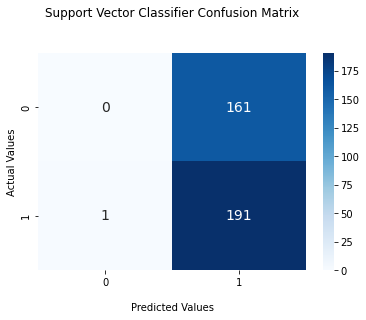

0.5410764872521246

In [29]:
classification_algorithm(SVC(C=1, gamma=0.001, kernel='rbf'), X_train, y_train, X_test, title='Support Vector Classifier')

# Strategy 2
Utilize the 50-day moving average vs the 200-day moving average.

A golden cross (or golden crossover) is a chart pattern that involves a short-term moving average crossing
above a long-term moving average. 

Typically, the 50-day MA is used as the short-term average, and the
200-day MA is used as the long-term average. This is an indicator of bullish (buying) signal.
(See Figure-1 next page)

Figure : 1
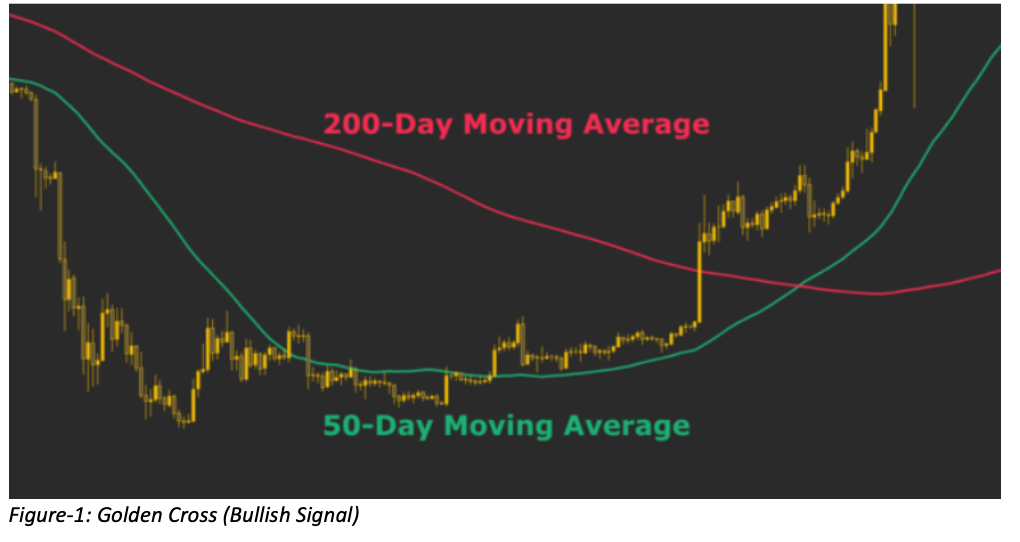


A death cross is basically the opposite of a golden cross. It’s a chart pattern where a short-term MA crosses below a long-term MA. 


For example, the 50-day MA crosses below the 200-day MA. As such, a death cross is typically considered to be a bearish (selling) signal.

In [30]:
# Moving Average : The moving average (MA) is used to identify the direction of a current price trend, without the interference of shorter-term price spikes.
apple_df['MA 50'] = apple_df['Close'].rolling(window=50).mean()
apple_df['MA 200'] = apple_df['Close'].rolling(window=200).mean()
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600,-1,Sell,NaN,NaN
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000,-1,Sell,NaN,NaN
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600,-1,Sell,NaN,NaN
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600,1,Buy,NaN,NaN
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000,1,Buy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1757,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,-1,Sell,144.131800,152.1331
1758,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,-1,Sell,143.964799,152.0096
1759,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,1,Buy,143.637399,151.8867
1760,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700,1,Buy,143.354599,151.7593


In [31]:
apple_df['Date'] = pd.to_datetime(apple_df['Date']).dt.date

In [32]:
fig1 = go.Figure(data=go.Scatter(x=apple_df['Date'], y=apple_df['Close'], mode='lines', name='Close Price'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=50).mean(),marker_color='Orange',name='50 MA'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=200).mean(), marker_color='Red', name='200 MA'))
fig1.show()

**Conclusion** : From Above graph, We can visualize that, as much as the rolling window is small, the moving average is somehow significant and closer to the actual data.

In [33]:
apple_df 

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600,-1,Sell,NaN,NaN
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000,-1,Sell,NaN,NaN
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600,-1,Sell,NaN,NaN
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600,1,Buy,NaN,NaN
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000,1,Buy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1757,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,-1,Sell,144.131800,152.1331
1758,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,-1,Sell,143.964799,152.0096
1759,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,1,Buy,143.637399,151.8867
1760,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700,1,Buy,143.354599,151.7593


In [34]:
# When a short-term moving average(MA 50) crossing above a long-term moving average (MA 200) which basically indicates the buying signal. 
# Opoosite of this is a selling signal.
apple_df['Signal_target'] = np.where(apple_df['MA 50'] > apple_df['MA 200'], 1.0, 0.0)
apple_df['Position'] = apple_df['Signal_target'].diff()
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200,Signal_target,Position
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600,-1,Sell,NaN,NaN,0.0,NaN
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000,-1,Sell,NaN,NaN,0.0,0.0
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012115,273829600,-1,Sell,NaN,NaN,0.0,0.0
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600,1,Buy,NaN,NaN,0.0,0.0
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000,1,Buy,NaN,NaN,0.0,0.0


In [35]:
# droping nan values 
apple_df=apple_df.dropna(how='all')

In [36]:
fig1 = go.Figure(data=go.Scatter(x=apple_df['Date'], y=apple_df['Close'], mode='lines', name='Close Price'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=50).mean(),marker_color='Orange',name='50 MA'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=200).mean(), marker_color='darkslategray', name='200 MA'))
fig1.add_trace(go.Scatter(x=apple_df[apple_df['Position'] == 1].Date, y=apple_df['MA 50'][apple_df['Position'] == 1], marker_symbol='triangle-up',
                          marker_color="Green",mode='markers',
                          marker_size=15, name='Buy (Golden Cross)'))
fig1.add_trace(go.Scatter(x=apple_df[apple_df['Position'] == -1].Date, y=apple_df['MA 50'][apple_df['Position'] == -1], 
                          marker_symbol='triangle-down',mode='markers',
                          marker_color="Red", marker_size=15,name='Sell (Death Cross'))
fig1.show()

In [37]:
### Algorithm for Strategy 2 

In [38]:
# prepocessing and clean the data
apple_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Signal             0
stock_signal       0
MA 50             49
MA 200           199
Signal_target      0
Position           1
dtype: int64

In [39]:
# filling Nan values with 0
apple_df.fillna(0, inplace=True)

In [40]:
# define independent and dependent variable
X = apple_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = apple_df['Signal_target']

# train test spilt
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

KNeighbors Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       0.34      0.16      0.22        86
         1.0       0.77      0.90      0.83       267

    accuracy                           0.72       353
   macro avg       0.56      0.53      0.52       353
weighted avg       0.67      0.72      0.68       353

Accuracy: 71.95467422096317


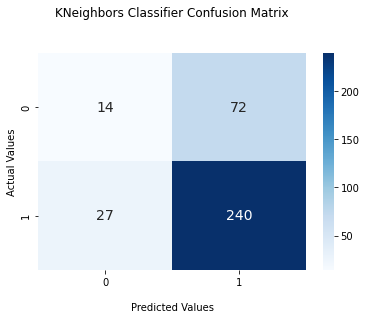

Random Forest Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71        86
         1.0       0.89      0.94      0.92       267

    accuracy                           0.87       353
   macro avg       0.84      0.80      0.82       353
weighted avg       0.87      0.87      0.87       353

Accuracy: 87.25212464589235


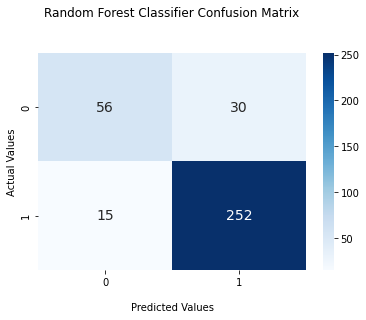

GradientBoosting Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       0.84      0.56      0.67        86
         1.0       0.87      0.97      0.92       267

    accuracy                           0.87       353
   macro avg       0.86      0.76      0.79       353
weighted avg       0.86      0.87      0.86       353

Accuracy: 86.68555240793201


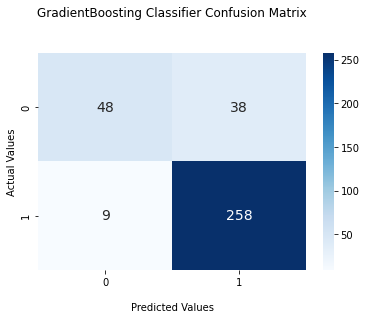

SVM Confusion Matrix Algorithm :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        86
         1.0       0.76      1.00      0.86       267

    accuracy                           0.76       353
   macro avg       0.38      0.50      0.43       353
weighted avg       0.57      0.76      0.65       353

Accuracy: 75.63739376770539


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



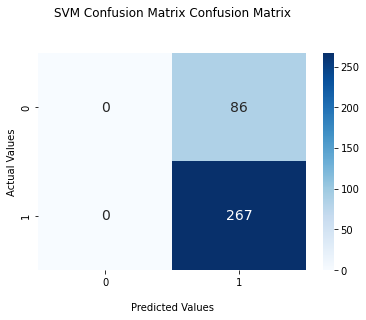

XGBClassifier Confusion Matrix Algorithm :
              precision    recall  f1-score   support

         0.0       0.88      0.59      0.71        86
         1.0       0.88      0.97      0.93       267

    accuracy                           0.88       353
   macro avg       0.88      0.78      0.82       353
weighted avg       0.88      0.88      0.87       353

Accuracy: 88.10198300283287


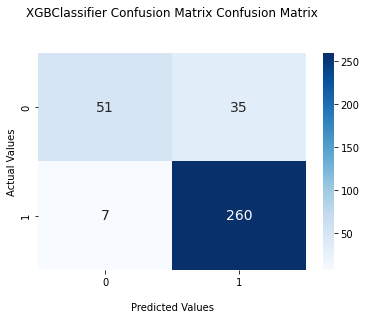

In [41]:
knn_result_s2 = classification_algorithm(KNeighborsClassifier(), X_train, y_train, X_test, title='KNeighbors Classifier')
rf_result_s2 = classification_algorithm(RandomForestClassifier(), X_train, y_train, X_test, title='Random Forest Classifier')
gb_result_s2 = classification_algorithm(GradientBoostingClassifier(), X_train, y_train, X_test, title='GradientBoosting Classifier')
svm_result_s2 = classification_algorithm(SVC(), X_train, y_train, X_test, title='SVM Confusion Matrix')
xg_result_s2 = classification_algorithm(XGBClassifier(), X_train, y_train, X_test, title='XGBClassifier Confusion Matrix')

In [42]:
results_strategy2 = pd.DataFrame([

    {'Algorithm' : 'K-Nearest Neighbors (KNN)', 'Accuracy' : knn_result_s2*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf_result_s2*100},
    
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : gb_result_s2*100},
    
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : svm_result_s2*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xg_result_s2*100}
])

results_strategy2.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
4,XGBoost Algorithm (XGB),88.101983
1,Random Forest,87.252125
2,Gradient Boosting,86.685552
3,Support Vector Machine,75.637394
0,K-Nearest Neighbors (KNN),71.954674


**Observation** : XGBoost is preforming better interms of accuracy as well as it generated correct amount of signals compared to other algorithms. 

In [43]:
## Hyperparameter Tuning with Random Forest 

rf = RandomForestClassifier()
forest_params = [{'n_estimators':[200,250,300,450], 'criterion':['gini','entropy']}]

clf = GridSearchCV(rf, forest_params, cv = 5,verbose=2)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...................criterion=gini, n_estimators=200; total time=   1.4s
[CV] END ...................criterion=gini, n_estimators=200; total time=   1.1s
[CV] END ...................criterion=gini, n_estimators=200; total time=   2.6s
[CV] END ...................criterion=gini, n_estimators=200; total time=   2.2s
[CV] END ...................criterion=gini, n_estimators=200; total time=   1.9s
[CV] END ...................criterion=gini, n_estimators=250; total time=   1.8s
[CV] END ...................criterion=gini, n_estimators=250; total time=   1.6s
[CV] END ...................criterion=gini, n_estimators=250; total time=   1.5s
[CV] END ...................criterion=gini, n_estimators=250; total time=   1.9s
[CV] END ...................criterion=gini, n_estimators=250; total time=   3.1s
[CV] END ...................criterion=gini, n_estimators=300; total time=   1.1s
[CV] END ...................criterion=gini, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [200, 250, 300, 450]}],
             verbose=2)

In [44]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

Random Forest Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       0.81      0.69      0.74        86
         1.0       0.90      0.95      0.93       267

    accuracy                           0.88       353
   macro avg       0.86      0.82      0.83       353
weighted avg       0.88      0.88      0.88       353

Accuracy: 88.38526912181302


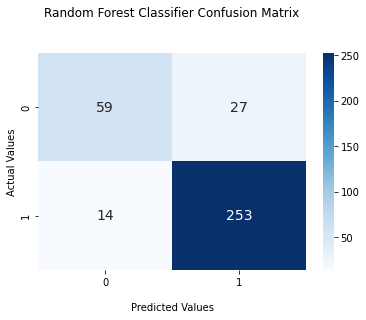

0.8838526912181303

In [45]:
classification_algorithm(RandomForestClassifier(criterion='entropy', n_estimators=200), X_train, y_train, X_test, title='Random Forest Classifier')

## Conclude :

Strategy 1 & 2 are useful interms of predicting when to buy or sell a stock.

However, Stock predictions also depend on many other factors such as 

*   Economic indicators, 
*   Interest rates, 
*   Other important economic news,
*   Dividends, 
*   Major announcements

**Strategy 1 Best Model** :

     Support Vector Classifer 


**Strategy 2 Best Model** :

      Random Forest 